In [1]:
import sqlite3

In [3]:
import random

# step 1 Connecting sqlite databse

In [6]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# step 2: create data

In [9]:
cursor.execute("DROP TABLE IF EXISTS sales") # To delete old data if exists

In [15]:
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product TEXT,
        quantity INTEGER,
        price REAL
        )
        ''')
# INSERT DATA
products = ["Apple", "Banana", "Orange" , "Mango" , "Grapes"]
sample_data = []


for _ in range(50):
    product = random.choice(products)
    quantity = random.randint(1, 20)        # Random quantity between 1 and 20
    price = round(random.uniform(0.5, 3.0), 2)  # Random price between 0.5 and 3.0
    sample_data.append((product, quantity, price))

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

# Step 4: Save and close
conn.commit()
conn.close()


In [43]:

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Show all records in the table
cursor.execute("SELECT * FROM sales")

# Fetch all rows and print
rows = cursor.fetchall()
for row in rows:
    print(row)

conn.close()



(1, 'Grapes', 2, 1.62)
(2, 'Mango', 18, 0.95)
(3, 'Mango', 4, 1.18)
(4, 'Mango', 14, 1.07)
(5, 'Grapes', 19, 2.26)
(6, 'Apple', 9, 2.46)
(7, 'Apple', 10, 2.44)
(8, 'Mango', 9, 2.07)
(9, 'Banana', 13, 2.22)
(10, 'Banana', 14, 2.46)
(11, 'Apple', 13, 2.67)
(12, 'Apple', 12, 1.16)
(13, 'Banana', 12, 2.02)
(14, 'Banana', 10, 2.7)
(15, 'Grapes', 5, 2.0)
(16, 'Mango', 4, 2.31)
(17, 'Apple', 20, 2.74)
(18, 'Apple', 13, 1.82)
(19, 'Grapes', 18, 2.38)
(20, 'Grapes', 5, 2.32)
(21, 'Orange', 9, 2.11)
(22, 'Orange', 15, 1.41)
(23, 'Orange', 18, 0.87)
(24, 'Mango', 9, 1.64)
(25, 'Apple', 11, 0.95)
(26, 'Banana', 18, 2.37)
(27, 'Mango', 15, 2.74)
(28, 'Apple', 16, 1.4)
(29, 'Mango', 3, 2.21)
(30, 'Banana', 18, 2.39)
(31, 'Apple', 12, 0.7)
(32, 'Orange', 9, 1.92)
(33, 'Banana', 18, 0.5)
(34, 'Banana', 18, 0.85)
(35, 'Apple', 19, 2.87)
(36, 'Orange', 5, 2.73)
(37, 'Orange', 10, 1.36)
(38, 'Apple', 19, 1.09)
(39, 'Banana', 5, 2.95)
(40, 'Banana', 18, 1.25)
(41, 'Banana', 14, 2.37)
(42, 'Mango', 16, 0.9

In [51]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("sales_data.db")

df = pd.read_sql_query("SELECT * FROM sales", conn)
print(df.head())

conn.close()


   id product  quantity  price
0   1  Grapes         2   1.62
1   2   Mango        18   0.95
2   3   Mango         4   1.18
3   4   Mango        14   1.07
4   5  Grapes        19   2.26


# STEP 4: Plot Sales Summary as a Bar Chart Using matplotlib


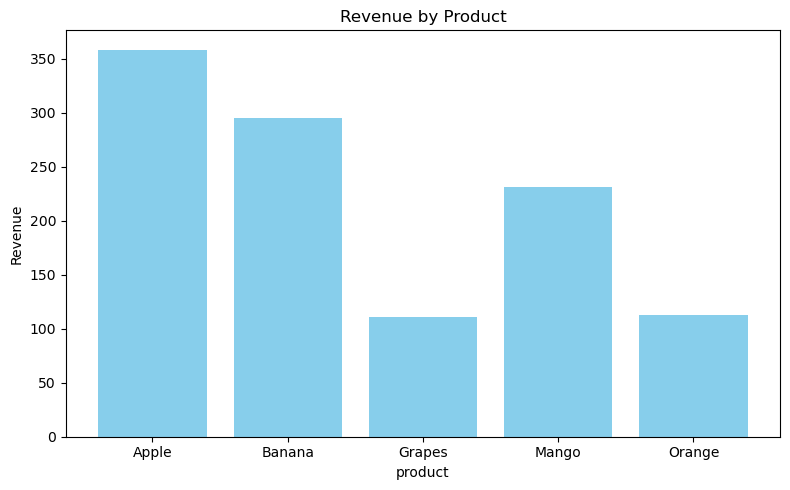

In [108]:
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd

# reconnect data base
conn = sqlite3.connect("sales_data.db")
# query the summary table
query = """
SELECT
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query,conn)
conn.close()

# plot bar chart
plt.figure(figsize=(8 , 5))
plt.bar(df['product'],df['total_revenue'],color= 'skyblue')
plt.title('Revenue by Product')
plt.xlabel('product')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

#### Conclusion:

The bar chart illustrates the total revenue generated by each product. It's clear that some products significantly outperform others in terms of revenue. This insight can help the business focus on promoting and stocking top-selling items to maximize profits.



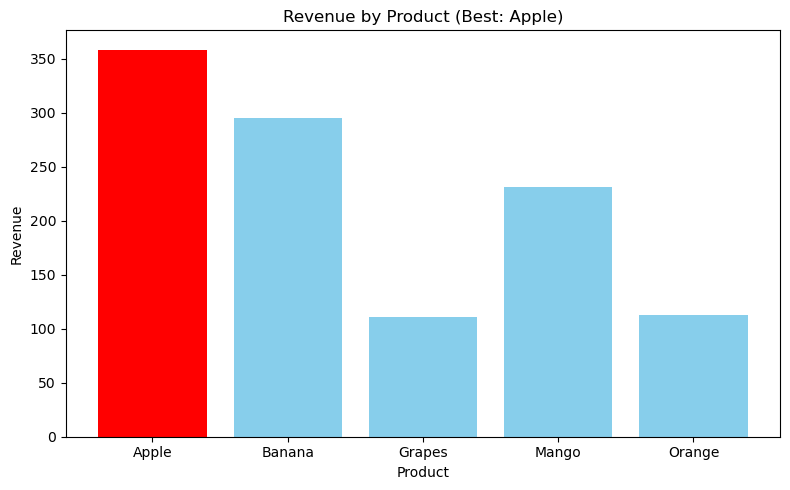

In [92]:

# Find the product with highest revenue
best_product = df.loc[df['total_revenue'].idxmax(), 'product']

# Color products: highlight best in red
colors = ['red' if p == best_product else 'skyblue' for p in df['product']]

# Bar chart with highlighted product
plt.figure(figsize=(8, 5))
plt.bar(df['product'], df['total_revenue'], color=colors)
plt.title(f"Revenue by Product (Best: {best_product})")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


#### Conclusion:

This chart highlights the product with the highest revenue in red. Visually emphasizing the best-seller allows for quick identification of the star product. This product can be a focus area for upselling, bundling, or further investment to boost overall sales.

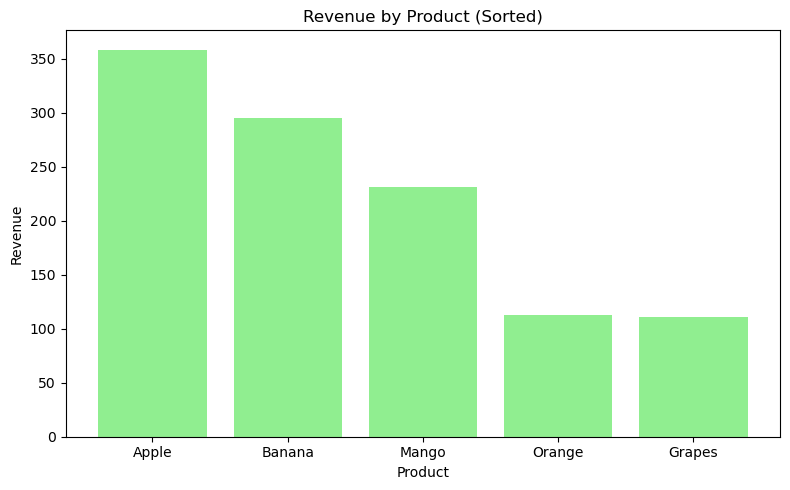

In [105]:
df_sorted = df.sort_values(by='total_revenue', ascending=False)

plt.figure(figsize=(8, 5))
plt.bar(df_sorted['product'], df_sorted['total_revenue'], color='lightgreen')
plt.title("Revenue by Product (Sorted)")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


#### Conclusion:

Sorting the products by total revenue reveals a clear ranking of top performers. The most profitable product stands out at the top, indicating strong customer demand or a high price point. Lower-performing products may require reevaluation of pricing or marketing strategies.



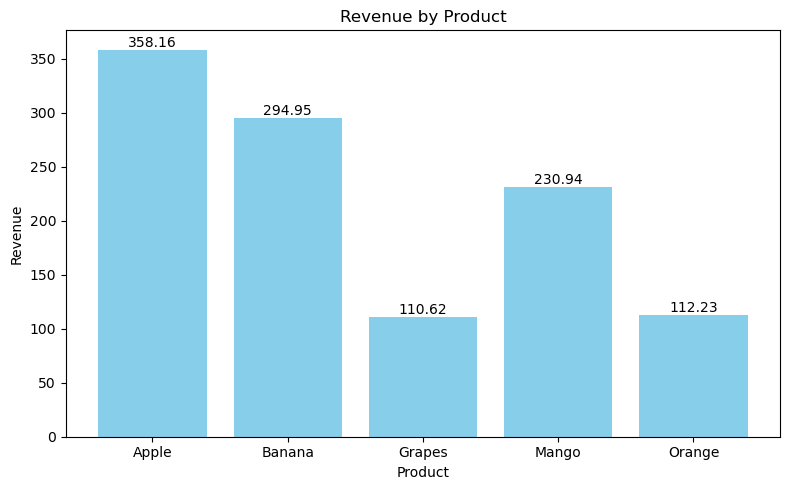

In [110]:
plt.figure(figsize=(8, 5))
bars = plt.bar(df['product'], df['total_revenue'], color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### Conclusion:

Comparing revenue and quantity sold side-by-side reveals interesting patterns. Some products sell in high volumes but generate less revenue, possibly due to low prices. Others bring in high revenue despite low quantity, indicating premium pricing. This analysis helps balance pricing strategy and inventory planning.



####
**Task 7 Summary:**  
In this task, I have created a small SQLite database with sales data and connected it to Python using `sqlite3`.  
using SQL queries to calculate total quantity sold and total revenue per product.  
The results were loaded into a Pandas DataFrame and displayed using `print()` and a bar chart with `matplotlib`.  
The top-selling product was visually highlighted in the chart for better insights.  
This task helped build skills in SQL, data analysis, and basic data visualization in Python.

